In [1]:
from scripts import *
# from read import *
from plots import *
# from tools import *

In [2]:
pose_error("V1_01_easy.txt")

For the frequency of  euroc_100hz
The deviation in VIO path and the groundtruth is:- 2.2958925016816445
For the frequency of  euroc_20hz
The deviation in VIO path and the groundtruth is:- 2.295433640091998
For the frequency of  60hz
The deviation in VIO path and the groundtruth is:- 2.2900346437997396
For the frequency of  20hz_loop_closing
The deviation in VIO path and the groundtruth is:- 2.2958925016816445
For the frequency of  tum_vi_20hz
The deviation in VIO path and the groundtruth is:- 2.2672104064082808
For the frequency of  20hz
The deviation in VIO path and the groundtruth is:- 2.2958925016816445
For the frequency of  tum_vi_100hz
The deviation in VIO path and the groundtruth is:- 2.2693368351218823
For the frequency of  40hz
The deviation in VIO path and the groundtruth is:- 2.2962196365038774
For the frequency of  10hz
The deviation in VIO path and the groundtruth is:- 2.2958925016816445


In [3]:
pose_error("dataset-room1_512_16.txt")

For the frequency of  euroc_100hz
The deviation in VIO path and the groundtruth is:- 1.079058205950448
For the frequency of  euroc_20hz
The deviation in VIO path and the groundtruth is:- 1.077776694643654
For the frequency of  60hz
The deviation in VIO path and the groundtruth is:- 1.0739048462401126
For the frequency of  20hz_loop_closing
The deviation in VIO path and the groundtruth is:- 1.079058205950448
For the frequency of  tum_vi_20hz
The deviation in VIO path and the groundtruth is:- 1.306933960504891
For the frequency of  20hz
The deviation in VIO path and the groundtruth is:- 1.079058205950448
For the frequency of  tum_vi_100hz
The deviation in VIO path and the groundtruth is:- 1.2565263662343102
For the frequency of  40hz
The deviation in VIO path and the groundtruth is:- 1.0791569282495481
For the frequency of  10hz
The deviation in VIO path and the groundtruth is:- 1.079058205950448


In [4]:
find_delays_all_modules()

For the frequency of  euroc_100hz
For  tracking  module
min --- avg --- max
0.00229 --- 0.007077201722017188 --- 0.03298


For  propagation  module
min --- avg --- max
8e-05 --- 0.00021242312423124204 --- 0.00286


For  msckf update  module
min --- avg --- max
1e-05 --- 0.0011566666666666674 --- 0.0164


For  slam update  module
min --- avg --- max
0.0 --- 0.003554501845018448 --- 0.01178


For  slam delayed  module
min --- avg --- max
0.0 --- 0.0017561439114391157 --- 0.02792


For  re-tri & marg  module
min --- avg --- max
0.0002 --- 0.0006184194341943421 --- 0.00444


For  total  module
min --- avg --- max
0.0039 --- 0.014376549815498149 --- 0.05061


For the frequency of  euroc_20hz
For  tracking  module
min --- avg --- max
0.00228 --- 0.004025239285714282 --- 0.02004


For  propagation  module
min --- avg --- max
8e-05 --- 0.00018397500000000196 --- 0.00152


For  msckf update  module
min --- avg --- max
1e-05 --- 0.0012779071428571445 --- 0.01693


For  slam update  module
min --

In [5]:
# for directories in os.listdir(os.getcwd()): 
#     if ('hz' in directories):
#         print(directories," Yes")
#     else:
#         print(directories," No")

Import the open_vins_file

In [6]:
folder_name = 'euroc_20hz'
file = os.getcwd() + '/' + folder_name + '/traj_estimate.txt'
euroc = pd.read_csv(file, delimiter=' ')
euroc_gt = pd.read_csv('V1_01_easy.txt', delimiter=' ')
np_table = euroc.to_numpy()

In [7]:
# euroc

Import the open_vins groundtruth

In [8]:
# euroc_gt

Tracking module

In [9]:
# tracking_min, tracking_avg, tracking = find_timebounds(np_table,1)

Propagation module

In [10]:
# for num in reversed(range(6)) :
#     print(num, end = " ")

Plot Trajectories 

In [11]:
folder_name = 'euroc_20hz'
euroc_file = os.getcwd() + '/' + folder_name + '/traj_estimate.txt'
gt_file = 'V1_01_easy.txt'

euroc_gt = read_2d(gt_file,' ')
euroc = read_2d(euroc_file,' ')

# plot_trajectories_2d('OPEN_VINS Trajectory', euroc) # considering Timestamp,PositionX,PositionY,Null
# plot_trajectories_2d('Goundtruth  Trajectory', euroc)

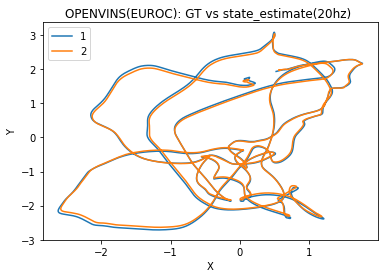

In [12]:
euroc_openvins_gt, euroc_openvins_estimated_60, euroc_openvins_estimated_rms_60 = analyze(euroc_gt, euroc)
plot_trajectories_2d('OPENVINS(EUROC): GT vs state_estimate(20hz) ', euroc_openvins_gt, euroc_openvins_estimated_60)

Finding out the ATE

In [13]:
euroc_rms_error, plt = ate(gt_file,euroc_file,plt)

NameError: name 'analyze' is not defined

In [30]:
print(euroc_rms_error[0])

[0.0457131]


In [16]:
gt = read_3d(gt_file)
euroc_3d = read_3d(euroc_file)

gt, euroc_3d, euroc_3d_rms = analyze(gt, euroc_3d)

euroc_3d, s = scale(gt, euroc_3d)
# slam2 = slam2 / s

# slam2_mean, slam2_std = rms(gt[:,1:], slam2[:,1:])
euroc_3d_mean, euroc_3d_std = rms(gt[:,1:], euroc_3d[:,1:])

In [17]:
euroc_rms_error = [ [euroc_3d_rms]
                ]

euroc_rms_error = np.asarray(euroc_rms_error, dtype=np.float64)

print(euroc_rms_error) # how is this calculation done??

[[0.0457131]]


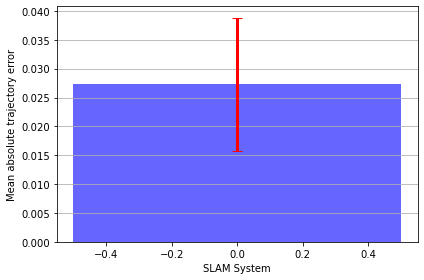

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.yaxis.grid(True)

error_config = {'ecolor': 'r', 'capsize': 5, 'elinewidth': 3}

opacity = 0.6
ax.set_ylabel('Mean absolute trajectory error')
#ax.set_title('Mean Absolute Trajectory Error for ORB-SLAM2 and Edge-SLAM')

line = plt.bar([0], [euroc_3d_mean], 1, alpha=opacity, yerr=(euroc_3d_std), error_kw=error_config, color='b')

ax.set_xlabel('SLAM System')
# plt.xticks([0], ('OPEN_VINS'))
fig.tight_layout()

plt.show()